In [22]:
import pandas as pd
import numpy as np

In [1]:
import yfinance as yf

In [2]:
ticker = yf.Ticker('AAPL')

In [3]:
data = ticker.history(period="1mo", interval="1d")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-11 00:00:00-04:00,177.965530,179.613368,177.366328,179.563431,47551100,0.0,0.0
2023-10-12 00:00:00-04:00,179.833087,182.100089,178.804428,180.472244,56743100,0.0,0.0
2023-10-13 00:00:00-04:00,181.181296,181.690619,177.905613,178.614685,51427100,0.0,0.0
2023-10-16 00:00:00-04:00,176.517454,178.844390,176.277764,178.484863,52517000,0.0,0.0
2023-10-17 00:00:00-04:00,176.417574,178.185249,174.570017,176.916916,57549400,0.0,0.0


## Data Cleaning


In [4]:
import pandas as pd


In [5]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [7]:
data.ffill(inplace= True)

In [8]:
data['Daily Return'] = data['Close'].pct_change()

## Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

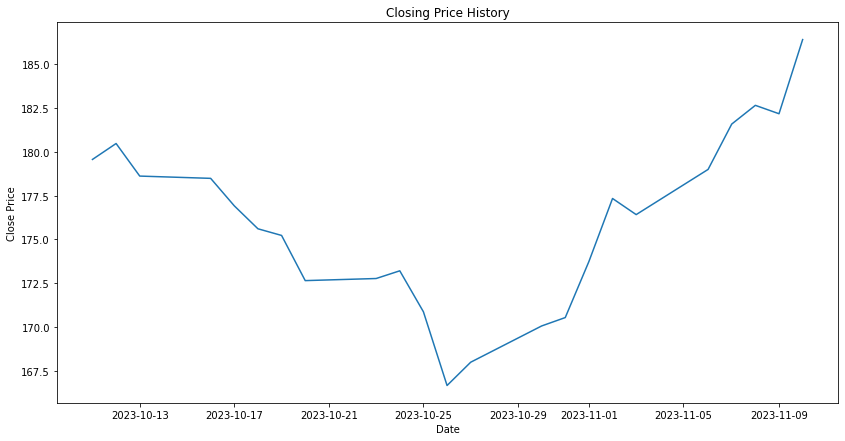

In [12]:
plt.figure(figsize=(14,7))
plt.plot(data['Close'])
plt.title('Closing Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

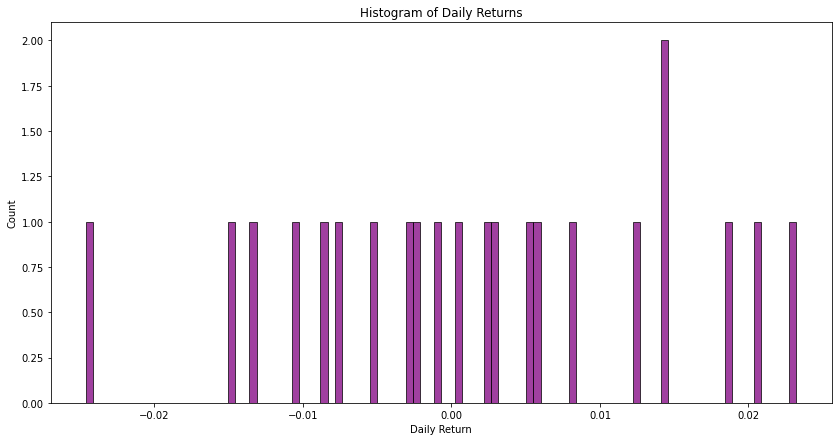

In [17]:
# Histogram of Daily Returns
plt.figure(figsize = (14,7))
sns.histplot(data['Daily Return'].dropna(), bins=100, color='purple')
plt.title("Histogram of Daily Returns")
plt.show()

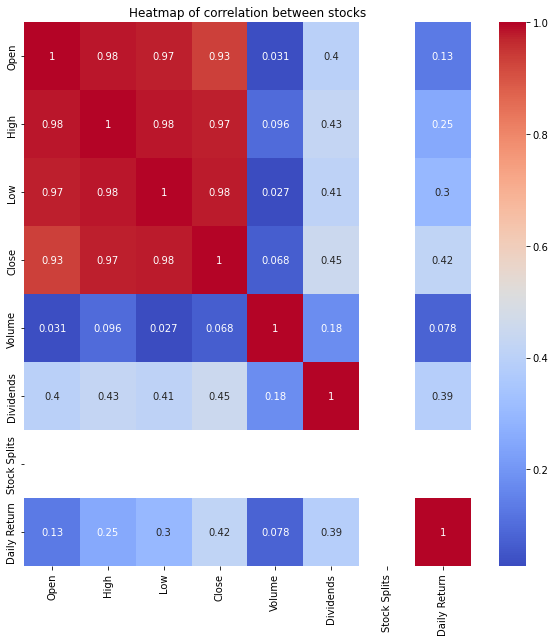

In [18]:
# Heatmap of correlations
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of correlation between stocks")
plt.show()

## Comparitive Study

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'AMZN', 'GOOGL', 'MSFT']
data = yf.download(tickers, start='2019-01-01', end='2023-11-01')['Close']

[*********************100%%**********************]  4 of 4 completed


In [23]:
# Data manipulation
daily_returns = data.pct_change()
volatility = daily_returns.std() * np.sqrt(252)  # There are typically 252 trading days in a year

In [25]:
# Volatillity of each stock
print(volatility)

AAPL     0.326669
AMZN     0.356208
GOOGL    0.320941
MSFT     0.308597
dtype: float64


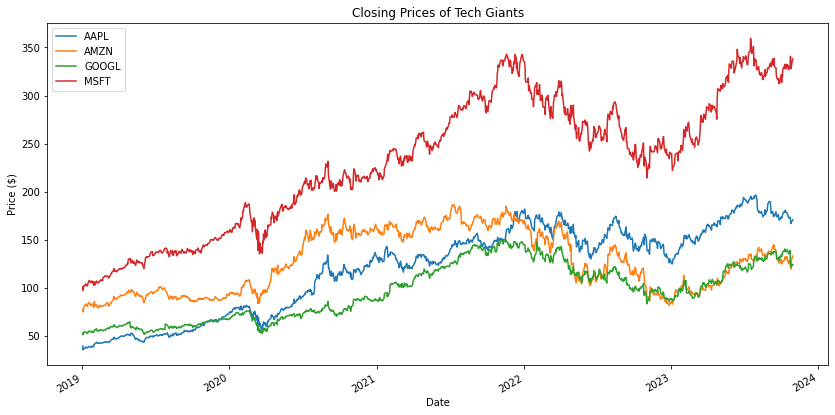

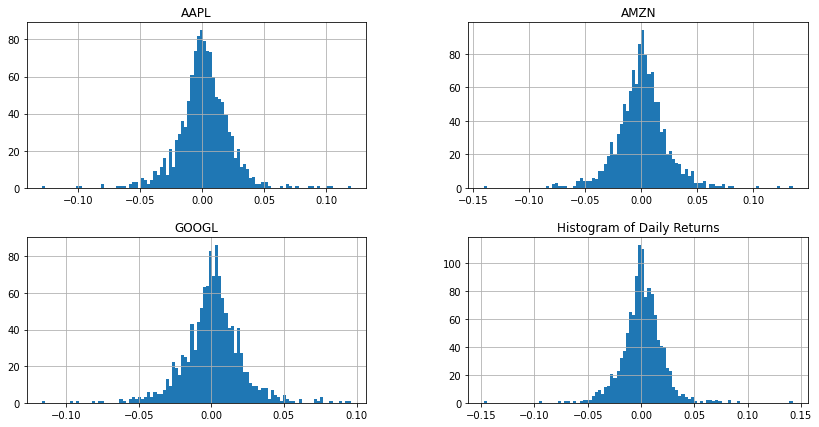

In [24]:
# Visualization
data.plot(figsize=(14,7))
plt.title('Closing Prices of Tech Giants')
plt.ylabel('Price ($)')
plt.show()

daily_returns.hist(bins=100, figsize=(14,7))
plt.title('Histogram of Daily Returns')
plt.show()

## Advance Visualization

In [35]:
ticker = yf.Ticker('AAPL')
data = ticker.history(period="12mo", interval="1d")
data.ffill(inplace= True)
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-11 00:00:00-05:00,145.009482,149.176179,143.567529,148.867905,93979700,0.0,0.0
2022-11-14 00:00:00-05:00,148.141962,149.444678,146.610514,147.455795,73374100,0.0,0.0
2022-11-15 00:00:00-05:00,151.373899,152.736280,147.734240,149.206009,89868300,0.0,0.0
2022-11-16 00:00:00-05:00,148.301073,149.036950,146.471289,147.962952,64218300,0.0,0.0
2022-11-17 00:00:00-05:00,145.616070,150.638003,145.337627,149.882233,80389400,0.0,0.0


In [36]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data.index,
                                     open=data['Open'],
                                     high=data['High'],
                                     low=data['Low'],
                                     close=data['Close'])])
fig.show()

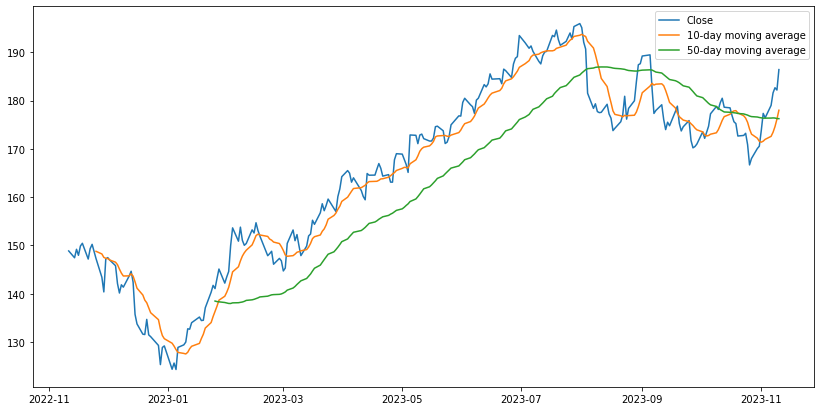

In [37]:
# Moving Averages
data['MA10'] = data['Close'].rolling(10).mean()
data['MA50'] = data['Close'].rolling(50).mean()

plt.figure(figsize=(14,7))
plt.plot(data['Close'], label='Close')
plt.plot(data['MA10'], label='10-day moving average')
plt.plot(data['MA50'], label='50-day moving average')
plt.legend()
plt.show()

/Users/siva/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



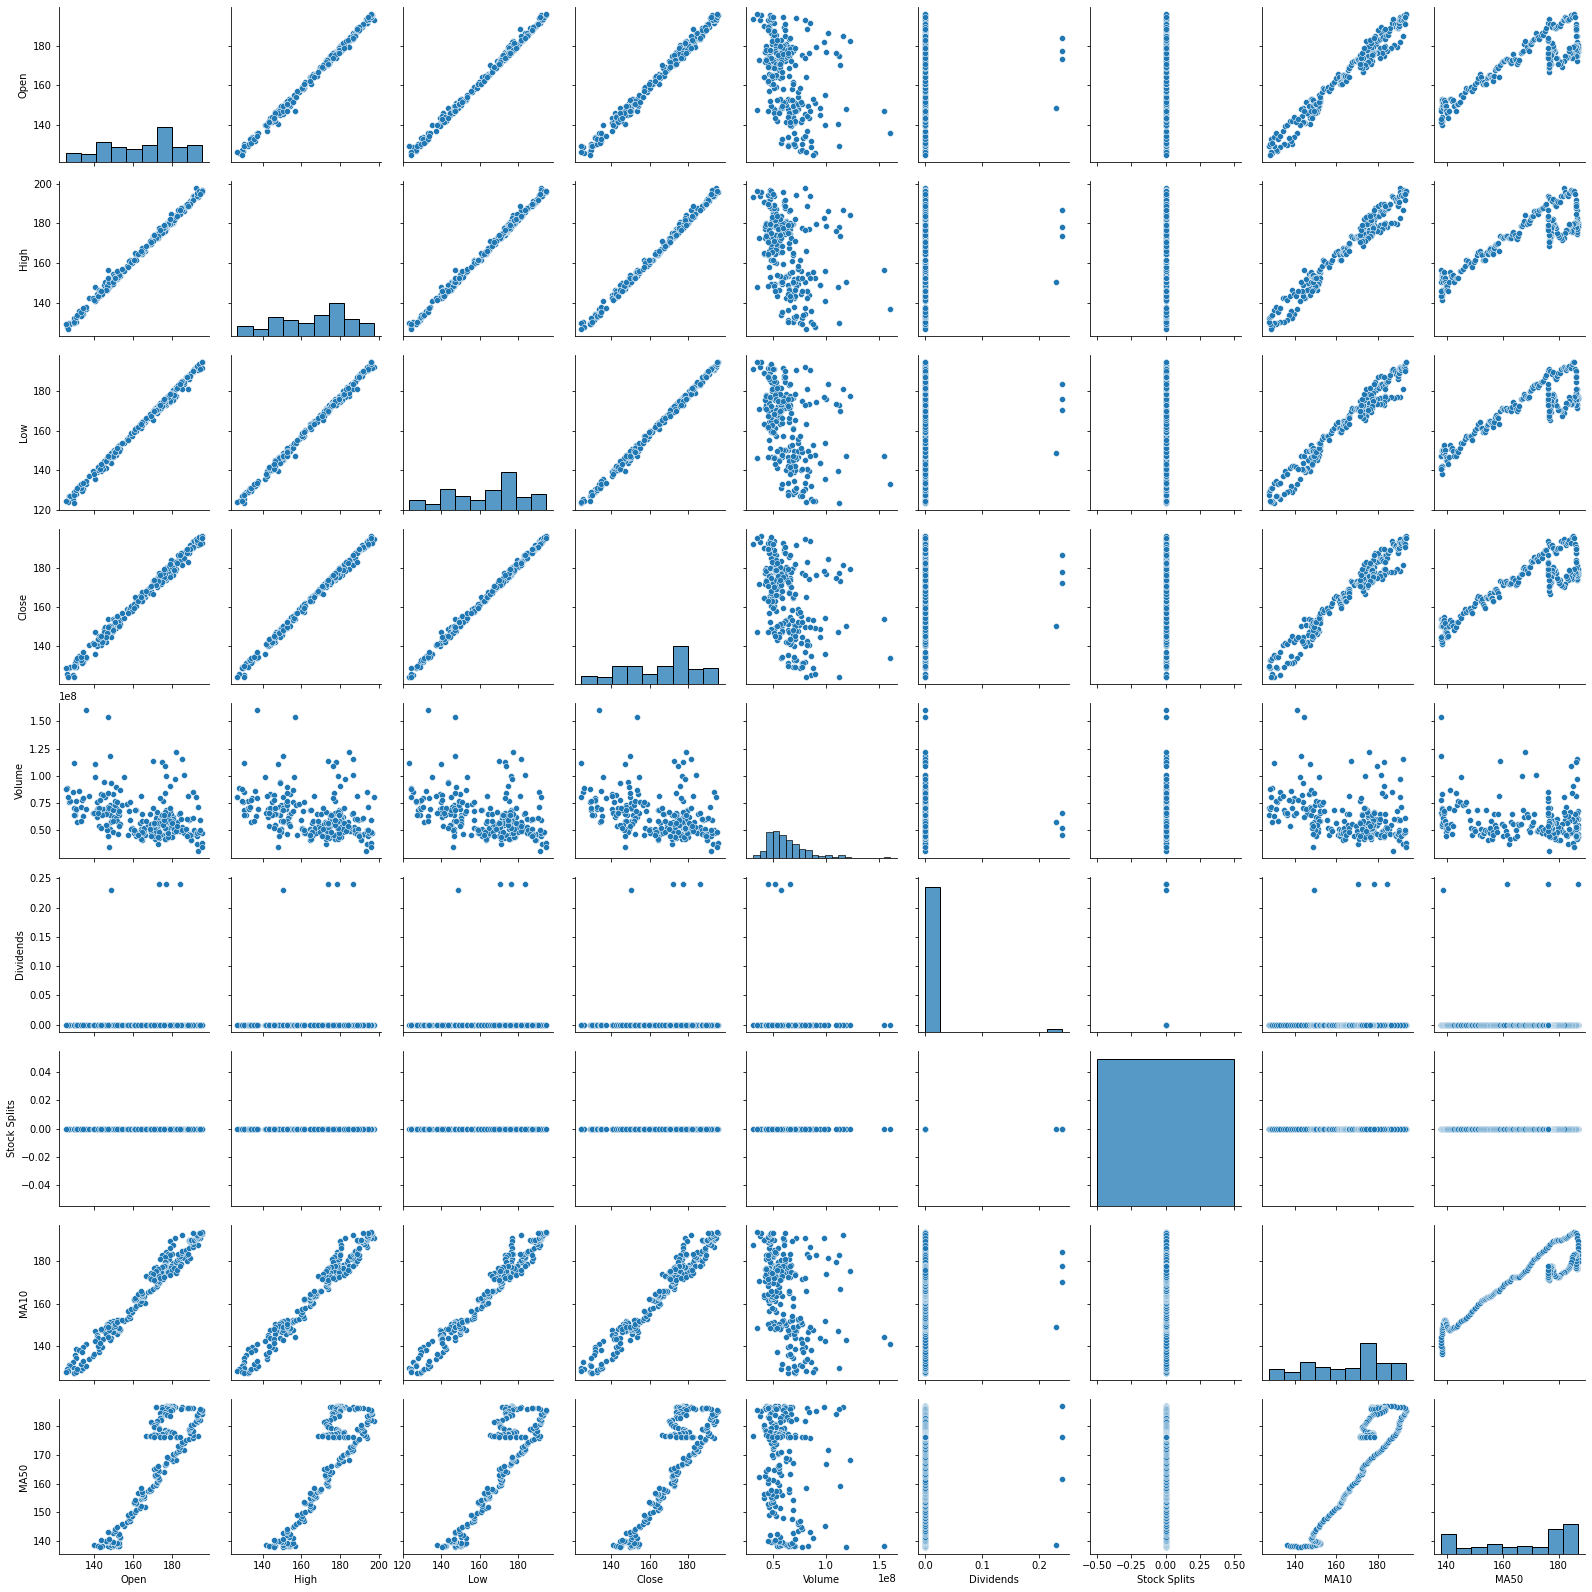

In [38]:
import seaborn as sns

sns.pairplot(data)

### Interactive Time Series with Bokeh: 
Bokeh is another library for creating interactive plots. It can handle large datasets and allows users to zoom in and out or hover over data points to see their values.


In [43]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

p = figure(x_axis_type="datetime", title="Stock Closing Prices", height=350, width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Price'
p.line(data.index, data['Close'], color='blue')
show(p)

Loading BokehJS ...